In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [3]:
df = pd.read_csv("/content/train.csv")
df.head()
df.shape
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [4]:
df.isnull().sum().sort_values(ascending=False)
df.duplicated().sum()


np.int64(0)

In [5]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [6]:
# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Title from Name (helps fill Age & capture social status)
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss').replace('Mme','Mrs')

# Fare log (reduce skew)
df['Fare_log'] = np.log1p(df['Fare'])

# Optionally: Age groups
df['Age_bin'] = pd.cut(df['Age'], bins=[0,12,20,40,60,120], labels=['child','teen','adult','mid','senior'])


Text(0.5, 1.0, 'Log Fare distribution')

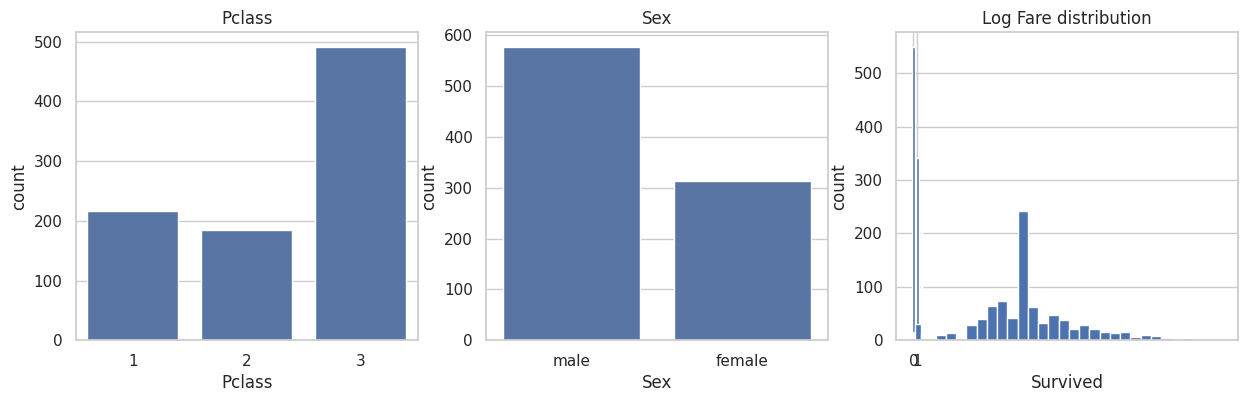

In [7]:
# Categorical counts
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.countplot(data=df, x='Pclass', ax=ax[0]); ax[0].set_title('Pclass')
sns.countplot(data=df, x='Sex', ax=ax[1]); ax[1].set_title('Sex')
sns.countplot(data=df, x='Survived', ax=ax[2]); ax[2].set_title('Survived')

# Numeric distributions
df['Age'].hist(bins=30)
plt.title('Age distribution')

df['Fare_log'].hist(bins=30)
plt.title('Log Fare distribution')


<Axes: xlabel='Sex', ylabel='count'>

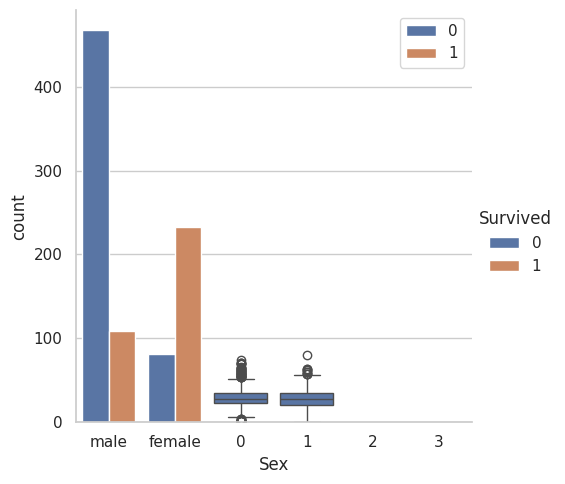

In [8]:
# Categorical vs Survived
sns.catplot(data=df, x='Sex', hue='Survived', kind='count')

# Boxplot for Age by Survived
sns.boxplot(data=df, x='Survived', y='Age')

# Pclass vs Survived
sns.barplot(data=df, x='Pclass', y='Survived')


<Axes: >

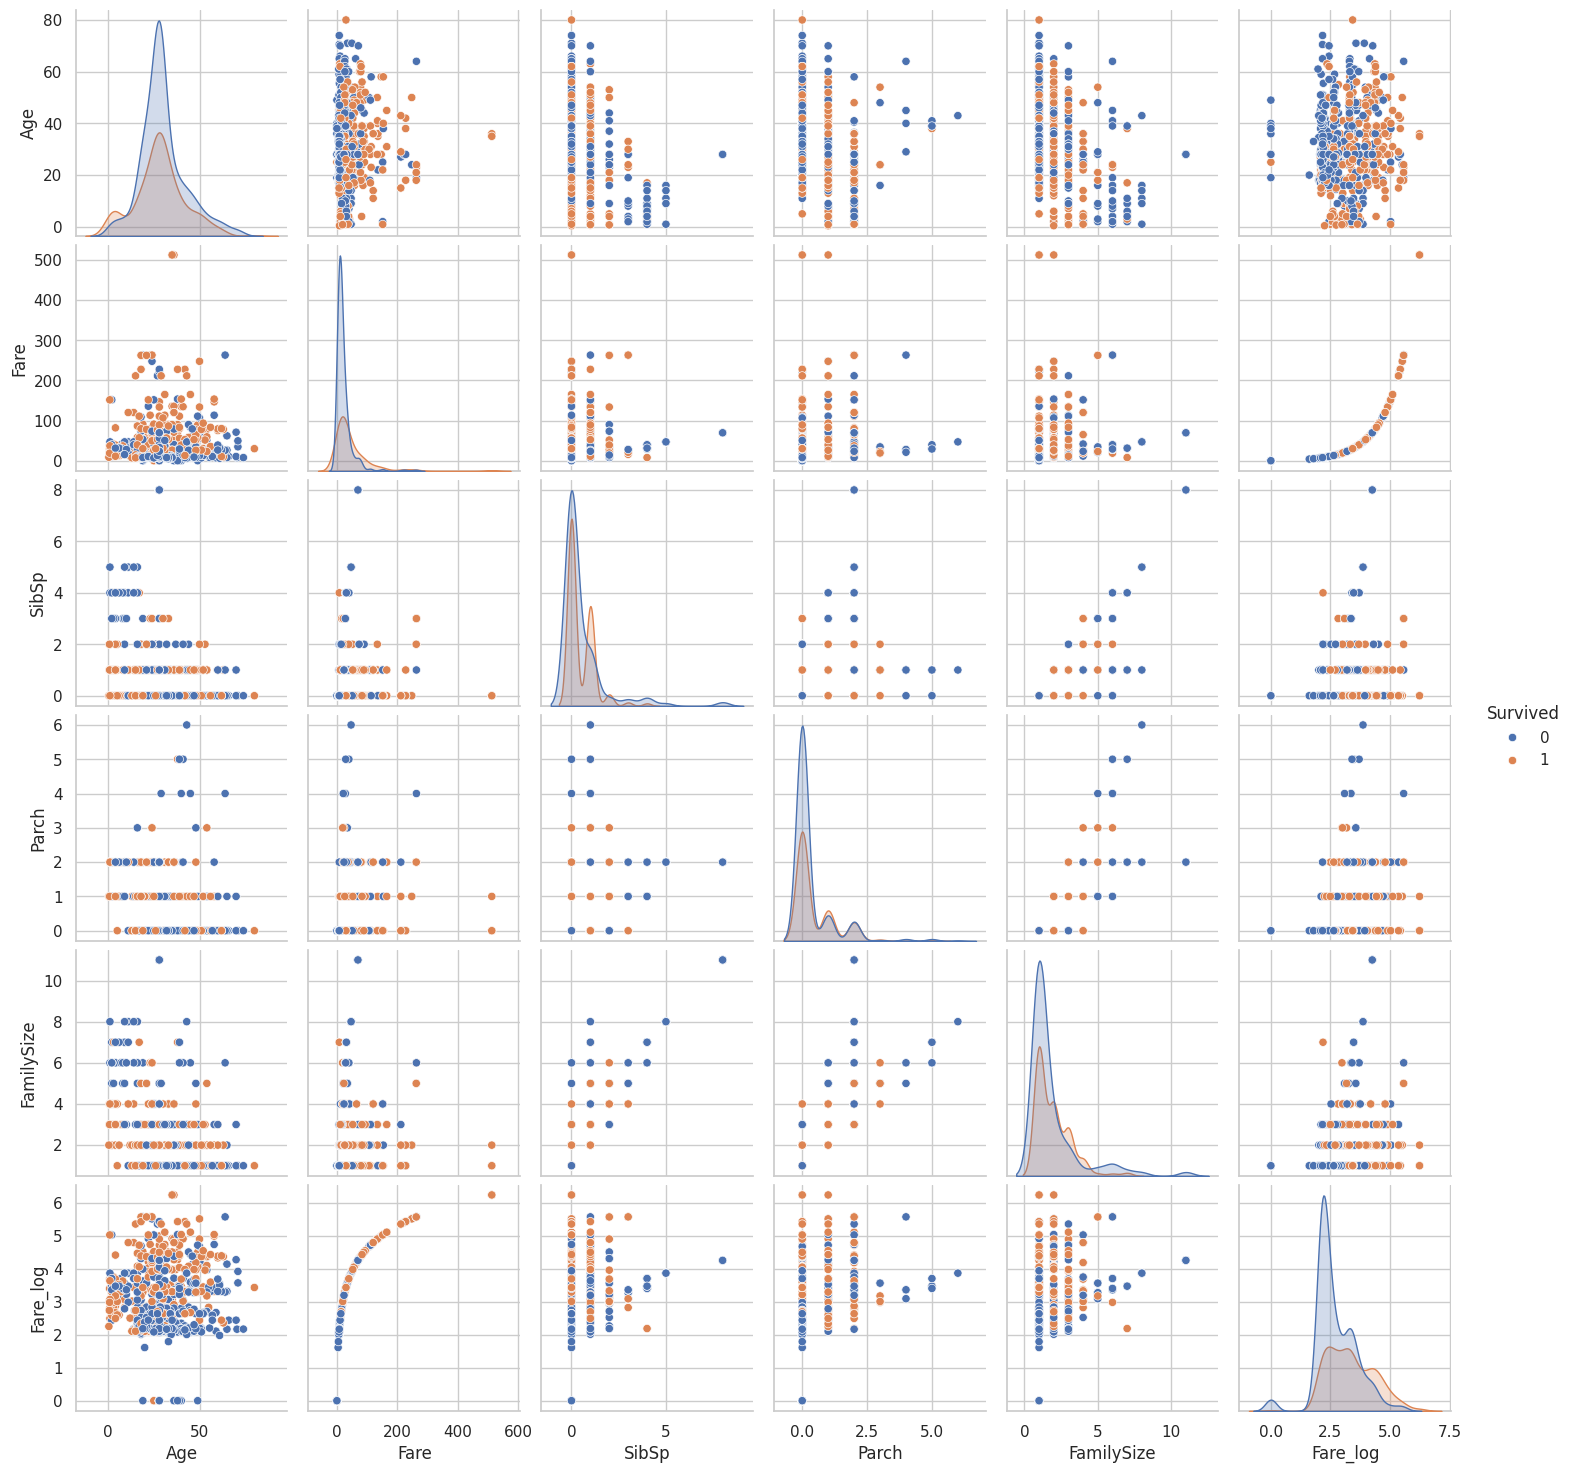

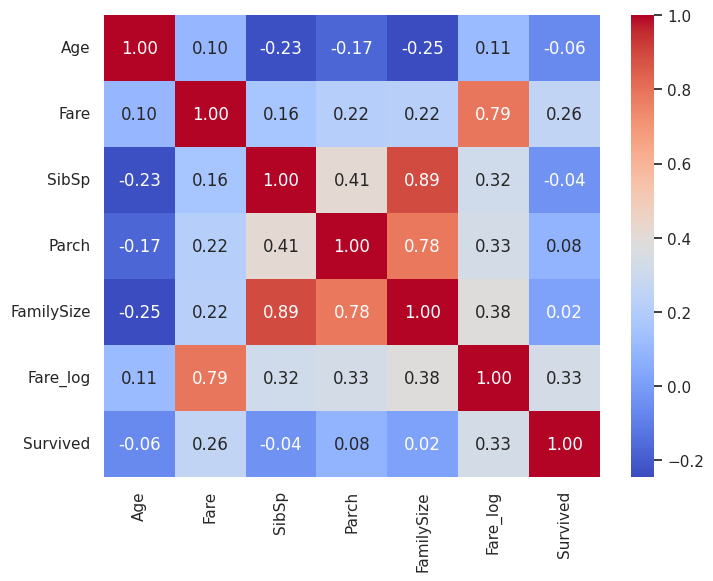

In [9]:
num_cols = ['Age','Fare','SibSp','Parch','FamilySize','Fare_log']
sns.pairplot(df[num_cols + ['Survived']], hue='Survived', diag_kind='kde')

corr = df[num_cols + ['Survived']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')


In [10]:
df[num_cols].skew()
# If skewed:
df['Fare_log'] = np.log1p(df['Fare'])


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Age','Fare_log','SibSp','Parch','FamilySize']].dropna()
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


,feature,VIF
0,Age,1.123709
1,Fare_log,1.240612
2,SibSp,22.845181
3,Parch,12.433607
4,FamilySize,87.830030
